# 군집화 (클러스터링)

- 비슷한 성향을 가진 그룹을 찾을 수 있음 
- 우리는 그 중 군집화의 알고리즘 K-Means를 사용하겠다

## K-Means 특징

- 전체 data를 k개로 군집화 하겠다는 뜻 
- 거리를 이용한 분류 / 연속형 범주에 적합한 모델
- 반복된 작업을 수행 (euclidian 거리기법)
- 짧은 계산 시간
- 주어진 자료에 대한 사전정보 없이 의미있는 자료구조 찾기 가능
- 범주형(카테고리형) 변수를 다룰 경우 주의 

## K-Means 순서

### KMeans(n_cluster = k)

- 주어진 값들 사이의 거리 혹은 유사성을 이용하여 분류
- 전체 데이터를 k개의 집단으로 그룹화
- 데이터를 기준점 중심으로 euclidian 거리가 최소가 되도록 k개의 그룹으로 군집
- 군집 별 중심 값에서 중심과의 거리를 기반으로 데이터를 분류하는 군집기법 

### Kmeans.fit()

- 학습시키기

### KMeans.inertia_

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘 되어있다

### KMeans.predict(data)

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

# 필요 라이브러리 불러오기 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [3]:
import glob

In [4]:
path = glob.glob('data/*.csv')
path

['data\\boston.csv']

In [5]:
data = pd.read_csv(path[0])

In [6]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자 

In [7]:
#'chas'는 범주형데이터 
# 군집화는 연속형 데이터로만 가능함 
del data['chas'] 

In [8]:
# 비교할 'medv'컬럼도 복사 후 제거하자 
medv = data['medv'] 
del data['medv']

In [9]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축해보자.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

`1. StandardScaler() - 정규화 객체 생성`

In [10]:
#정규화 진행 및 객체 생성
scaler = StandardScaler()

`2. scaler.fit(x) - 정규화 객체로 학습`

In [11]:
#데이터 학습 
scaler.fit(data)

StandardScaler()

`3. scaler.transform(x) - 학습된 학습기로 변수 x의 데이터를 변환`

In [12]:
scaler_data = scaler.transform(data)

`4. PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다. (객체를 생성하는 개념)

In [13]:
#객체생성 (2개의 객체 만들것임)
pca = PCA(n_components = 2)

`5. PCA.fit(x)`
- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

In [14]:
pca.fit(scaler_data)

PCA(n_components=2)

`6. PCA.fit_transform`
- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [15]:
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [16]:
#2개의 피쳐로 학습된 데이터를 데이터프레임 형태로 변환해주자 
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# 그렇다면 몇 개로 군집화를 하는게 가장 적당한가?
- 위의 데이터를 몇 개의 군집화로 나누는 것이 가장 올바른 군집화인지 살펴보자 

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [17]:
# 군집화 라이브러리 불러오기 
from sklearn.cluster import KMeans

In [18]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data2)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

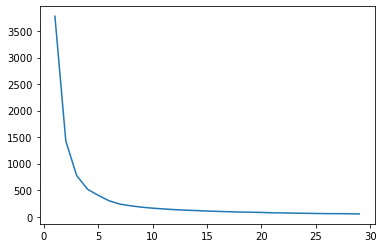

In [19]:
#그래프 그리기
plt.plot(x,y)

# ELBOW Point = 4 로 지정 후 클러스터링 시작 

In [20]:
# 4개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 4)

In [21]:
# 군집화 할 데이터 'data2'를 학습시키기 
kmeans.fit(data2)

KMeans(n_clusters=4)

In [22]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다


In [23]:
# 학습된 데이터를  labels 라는 컬럼에 넣어주자 
data2['labels'] = kmeans.predict(data2)

In [24]:
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,0
1,-1.456003,-0.947694,0
2,-2.073454,-0.625336,0
3,-2.610161,-0.134044,0
4,-2.456866,-0.229919,0


In [ ]:
# 위의 값들을 시각화 할거고 그래서 pca를 만든것 

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

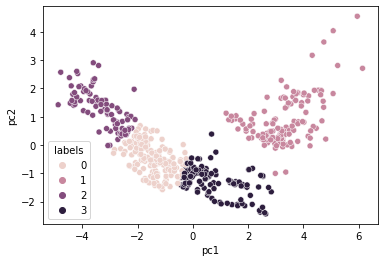

In [25]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data2)

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교하자

In [26]:
#집 값이랑 비교해야하니까 맨 첨에 떼어둔 data['medv']를 추가해주기
data2['medv'] = medv

In [27]:
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,0,24.0
1,-1.456003,-0.947694,0,21.6
2,-2.073454,-0.625336,0,34.7
3,-2.610161,-0.134044,0,33.4
4,-2.456866,-0.229919,0,36.2


In [28]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성합니다.
# labels값 별 집값의 평균을 구해놓은 변수임

mdedv_0 = data2[data2['labels']==0]['medv'].mean()
mdedv_1 = data2[data2['labels']==1]['medv'].mean()
mdedv_2 = data2[data2['labels']==2]['medv'].mean()
mdedv_3 = data2[data2['labels']==3]['medv'].mean()

<AxesSubplot:>

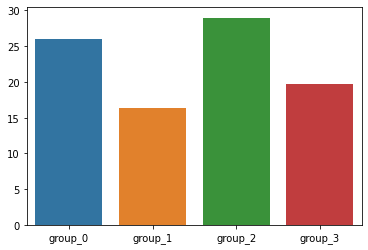

In [29]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'임을 잊지 말 것
sns.barplot(x = ['group_0','group_1','group_2','group_3'], y = [mdedv_0, mdedv_1, mdedv_2, mdedv_3])

# 그룹들의 특징을 살펴보자

최상위 그룹과 최하위 그룹의 특징을 살펴보며 집 값이 높은 이유 혹은 집 값이 낮은 이유에 대해서 살펴볼것

- 최 상위 그룹 - group 2
- 최 하위 그룹 - group 1

In [33]:
# 원본 데이터에 라벨을 복제합니다.
data['labels'] = data2['labels']
data

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,3
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,3
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,3
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,3


In [32]:
# 각 그룹의 데이터를 나누어서 변수에 담습니다.
group = data[(data['labels']==1) | (data['labels']==2)]
group

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,2
40,0.03359,75.0,2.95,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,2
41,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,2
52,0.05360,21.0,5.64,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,2
53,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,3.67367,0.0,18.10,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,1
486,5.69175,0.0,18.10,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,1
487,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,1
489,0.18337,0.0,27.74,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,1


In [36]:
#group에 있는 값들을 labels로 묶은 각 컬럼 별 평균치 구해주기
# 지저분한 index들 reset해주깅
group = group.groupby('labels').mean().reset_index()

In [37]:
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,2,0.065127,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409


# 시각화를 위한 subplot

`plt.subplots(행, 열, figsize = ())`

<AxesSubplot:xlabel='labels', ylabel='zn'>

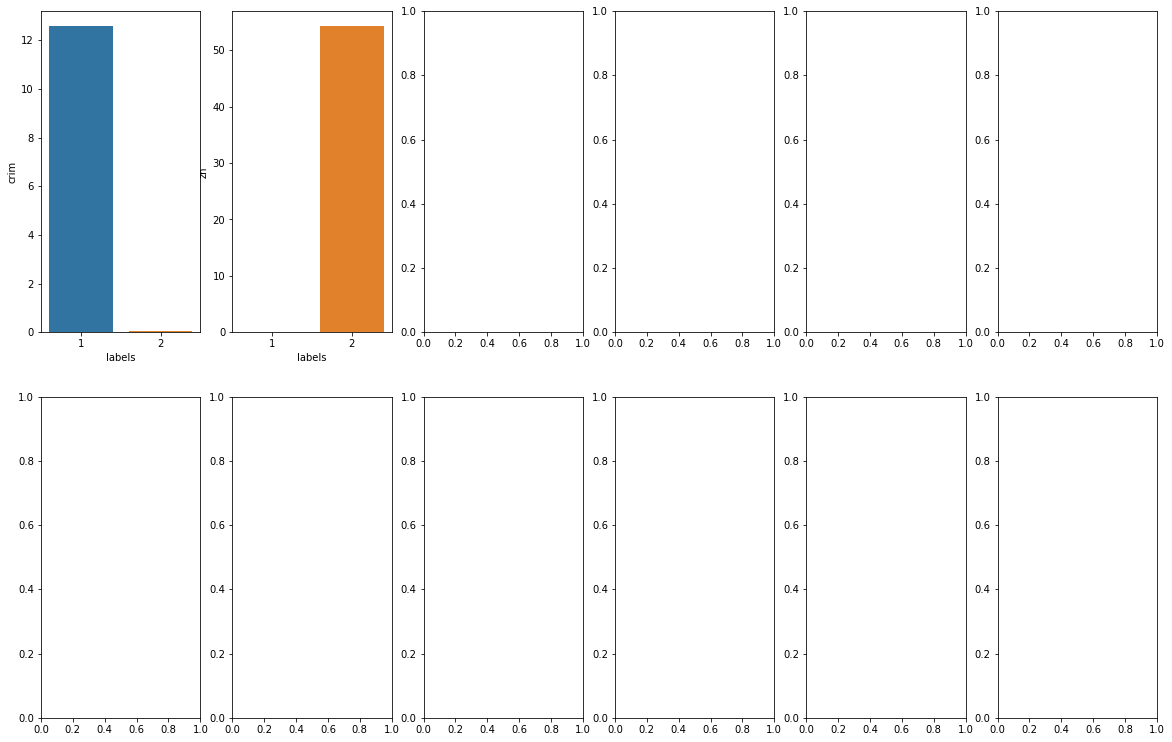

In [39]:
f, ax = plt.subplots(2, 6, figsize = (20,13))

sns.barplot(x = 'labels', y = 'crim', data = group, ax = ax[0,0])
sns.barplot(x = 'labels', y = 'zn', data = group, ax = ax[0,1])

In [40]:
# 컬럼이 10 개 이내면 위에처럼 노가다해서 그리면 된다. 근데 엄청 많다면? -> for문을 이용해 그림그리기 가능

In [43]:
#group 변수의 column들을 column이라는 새로운 변수로 지정해준다
column = group.columns
column

Index(['labels', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')

In [44]:
column[2]

'zn'

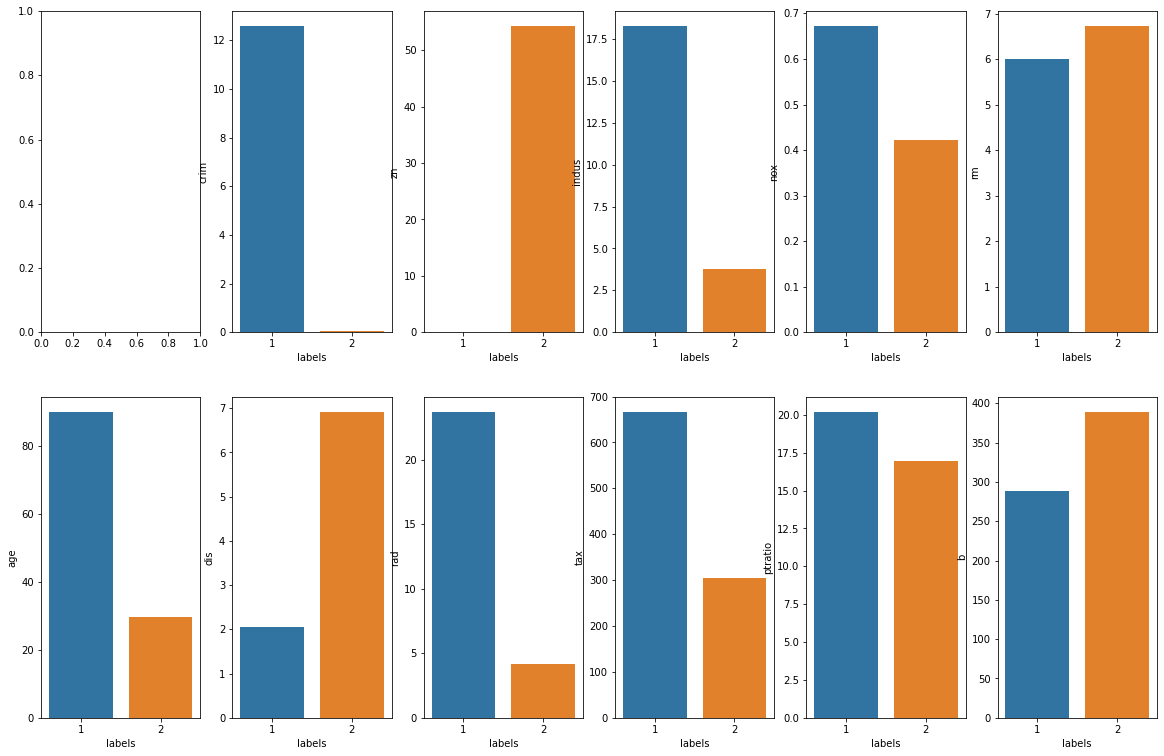

In [45]:
f, ax = plt.subplots(2, 6, figsize = (20,13))

            # 12개의 컬럼
for i in range(1, 12) :                                    # 열이 6개니까 아래처럼 해줘야 순서대로 그림출력
    sns.barplot(x = 'labels', y = column[i], data = group, ax = ax[i//6 , i%6])

# 결론

그래프에서 보이다 싶이 범죄율이 낮을 수록, 25,000 평방피트를 초과 거주지역 비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있습니다.

또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징들을 살펴볼 수 있습니다.

더 나아가 이번 시간에는 배우지 않지만 레이더차트라는것을 이용해서 그래프를 그린다면 더 깔끔한 시각화로 나타낼 수 있을 것 입니다.